# Foundation Machine Learning Frameworks
### Zohair Mubasheer Ahmed
### Student Id - 8897082
#### Lab Submission 2

<img width="500" alt="matplotlib" src="https://matplotlib.org/stable/_static/images/logo_dark.svg" />

# Matplollib Visualization
## Filled Polygon (Snowflake)


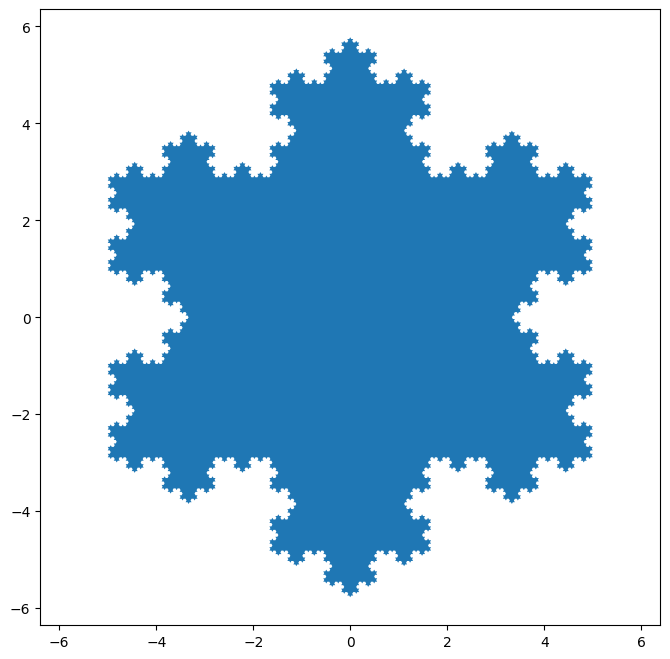

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

<img width="500" src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" alt="scikit-learn" />

# Sci-kit Visualization
## Three Dimensional Visualization


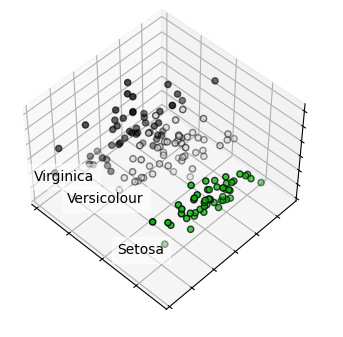

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

<img width="500" style="background-color:white;padding:20px" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="Seaborn">

# Seaborn Visualization
## Line plots on multiple facets



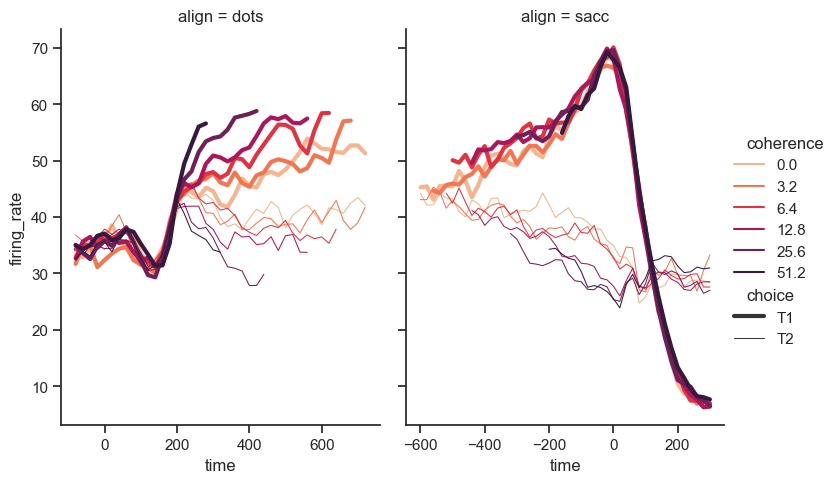

In [3]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

<img width="500" style="background-color:white;padding:20px" src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" alt="Seaborn">

# Seaborn Visualization
## Multiple linear regression


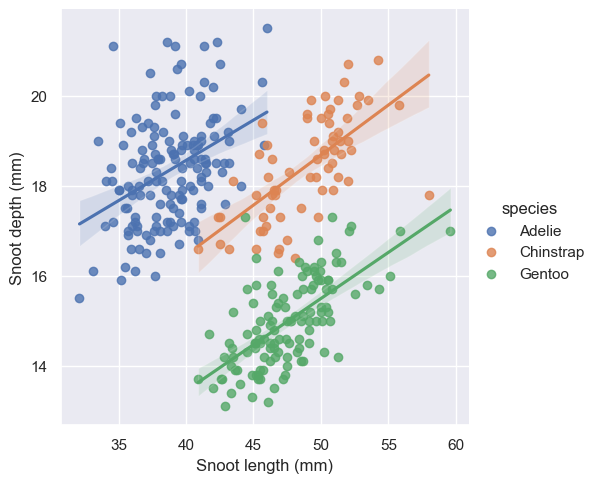

In [2]:
import seaborn as sns
sns.set_theme()

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")